In [141]:
import pandas as pd

df = pd.read_csv('data/wein.csv')
df.head()

,Alkohol,Apfelsaeure,Asche,Aschen_Alkanitaet,Magnesium,Alle_Phenole,Flavanoide,Nichtflavanoide_Phenole,Proanthocyanide,Farbintensitaet,Farbwert,Proteinwert,Prolinwert
0,14.23,1.71,2.43,15.06.,127,02.08.,03.06.,0.28,2.29,5.64,01.04.,3.92,1065
1,13.02.,1.78,2.14,11.02.,100,2.65,2.76,0.26,1.28,4.38,01.05.,03.04.,1050
2,13.16,2.36,2.67,18.06.,101,02.08.,3.24,0.30,2.81,5.68,01.03.,3.17,1185
3,14.37,1.95,02.05.,16.08.,113,3.85,3.49,0.24,2.18,07.08.,0.86,3.45,1480
4,13.24,2.59,2.87,21,118,02.08.,2.69,0.39,1.82,4.32,01.04.,2.93,735


In [142]:
df.shape

(178, 13)

In [143]:
df = df.applymap(lambda x: x.lstrip('0').rstrip('.') if isinstance(x, str) else x)
df = df.applymap(lambda x: float(x))
df.head()

,Alkohol,Apfelsaeure,Asche,Aschen_Alkanitaet,Magnesium,Alle_Phenole,Flavanoide,Nichtflavanoide_Phenole,Proanthocyanide,Farbintensitaet,Farbwert,Proteinwert,Prolinwert
0,14.23,1.71,2.43,15.06,127.0,2.08,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.02,1.78,2.14,11.02,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.04,1050.0
2,13.16,2.36,2.67,18.06,101.0,2.08,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.05,16.08,113.0,3.85,3.49,0.24,2.18,7.08,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.00,118.0,2.08,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [144]:
df.isna().any()

Alkohol                    False
Apfelsaeure                False
Asche                      False
Aschen_Alkanitaet          False
Magnesium                  False
Alle_Phenole               False
Flavanoide                 False
Nichtflavanoide_Phenole    False
Proanthocyanide            False
Farbintensitaet            False
Farbwert                   False
Proteinwert                False
Prolinwert                 False
dtype: bool

In [145]:
from sklearn.model_selection import train_test_split

X = np.array(df['Alkohol'])
y = np.array(df['Magnesium'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(142,)

In [146]:
from sklearn.linear_model import LinearRegression

# LinearRegression methods expect shape (n, 1) instead of (n, )
X_train = np.reshape(X_train, (-1, 1))
X_test = np.reshape(X_test, (-1, 1))

regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

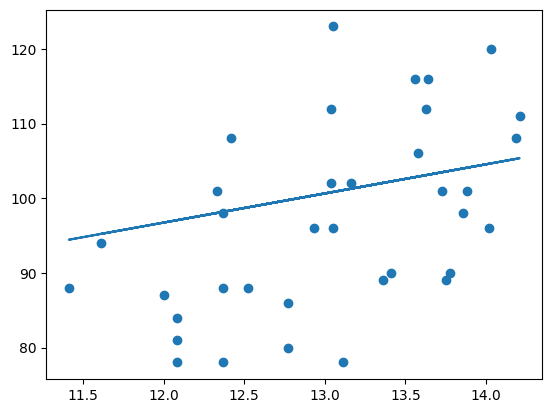

In [147]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regr.predict(X_test))

In [148]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
% np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

Coefficients: 
 [3.9000469]
Mean squared error: 10634.50
Variance score: -1.20


In [149]:
from itertools import combinations
datasets = []
regressors = []
for c in combinations(df.columns.tolist(), 2):
    attribute_1, attribute_2 = c
    X = np.array(df[attribute_1])
    y = np.array(df[attribute_2])
    datasets.append((X, y))
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = np.reshape(X_train, (-1, 1))

    regr = LinearRegression()
    regr.fit(X_train, y_train)
    regressors.append(regr)
len(datasets), len(regressors)

(78, 78)

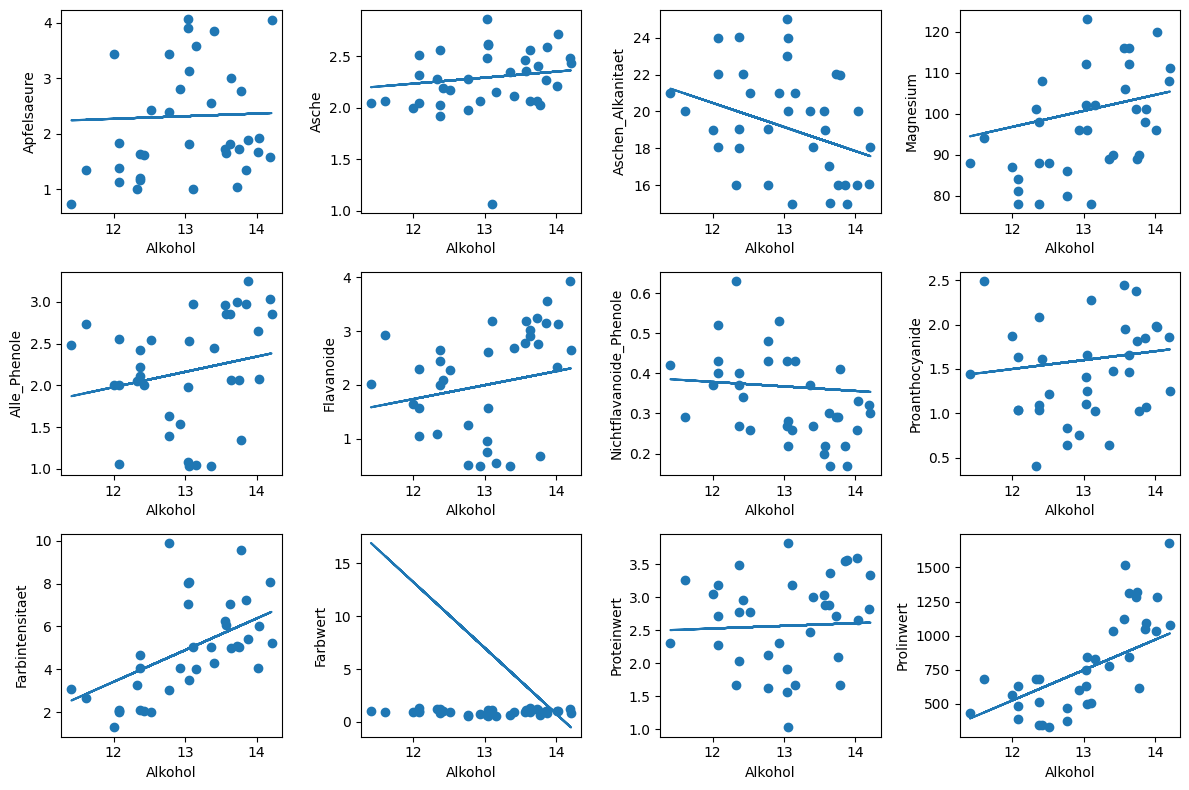

In [150]:
# Create subplots with 3 rows and 4 columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

alc_ds, alc_regr = datasets[:12], regressors[:12]
    
# Plot each set of y-axis data in a separate subplot
for i, ax in enumerate(axes):
    X, y = alc_ds[i]
    _, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_test = np.reshape(X_test, (-1, 1))
    ax.scatter(X_test, y_test)
    ax.plot(X_test, alc_regr[i].predict(X_test))
    ax.set_xlabel('Alkohol')
    ax.set_ylabel(df.columns[i+1])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()